In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys, os
sys.path.append(os.pardir)
sys.path.append('/content/drive/My Drive/Colab Notebooks/원격탐사딥러닝활용')
my_path='/content/drive/My Drive/Colab Notebooks/원격탐사딥러닝활용/'

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

데이터 만들기

In [ ]:
image_path = my_path + "car_seg/"
f = open(image_path + "list.txt", 'rt', encoding='utf-16')
lines = f.readlines()

image = np.zeros((len(lines), 256, 256, 3))
label = np.zeros((len(lines), 256, 256))

for i,line in enumerate(lines):
  line = line.strip() # 엔터문자 제거
  img = plt.imread(image_path + line)
  image[i] = img[:,:,:3]
  lbl = plt.imread(image_path + line[:-7] + "label.png")
  if lbl.ndim == 3:
    label[i] = lbl[:,:,:1].reshape(256,256)
  else:
    label[i] = lbl

  f.close()

In [ ]:
# 무작위로 섞음
num_our_images = image.shape[0]
mask = np.arange(0, num_our_images)
np.random.shuffle(mask)
image = image[mask]
label = label[mask]

In [ ]:
# 피클파일 만들기
with open(image_path + 'CARdata.pkl', 'wb') as f:
  pickle.dump(image,f)
with open(image_path + 'CARlabel.pkl', 'wb') as f:
  pickle.dump(label,f)

print(str(image.shape))
print(str(label.shape))

(158, 256, 256, 3)
(158, 256, 256)


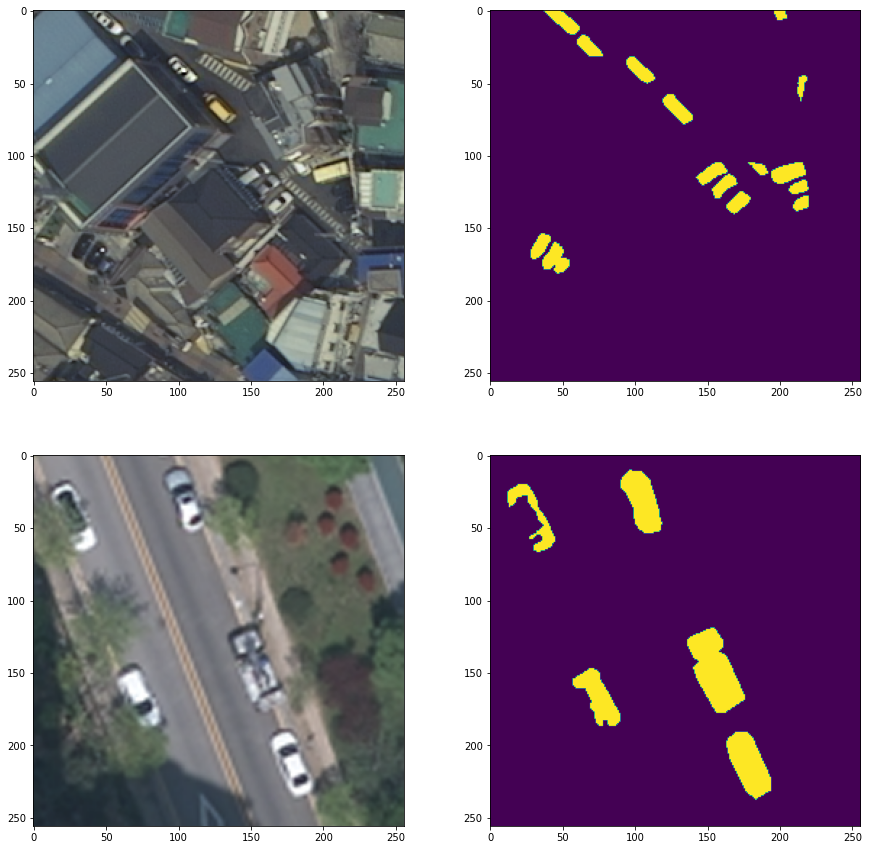

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image[5])
plt.subplot(2,2,2)
plt.imshow(label[5])
plt.subplot(2,2,3)
plt.imshow(image[15])
plt.subplot(2,2,4)
plt.imshow(label[15])